# Exploration 7. Portrait mode 사진 만들기 (Semantic Segmentation)

- **urllib**: 웹에서 데이터를 다운로드할 때 사용
- **cv2**: OpenCV 라이브러리로 이미지를 처리하기 위해 필요
- **pixellib**: 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
  - 준비된 시맨틱 세그멘테이션 모델 사용

In [1]:
import os
from os.path import join
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

print('슝=3')

슝=3


- 사용할 디렉터리 구조:
  - aiffel/human_segmentation  
    ├── models  
        └── deeplabv3_xception_tf_dim_ordering_tf_kernels.h5 (미리 준비할 필요는 없습니다)  
    ├── images
        └── my_image.png   (사진 이름은 각자 파일명에 따라 다르게 사용하시면 됩니다)  

## 0. PixelLib를 이용 DeepLab 세그멘테이션 모델 준비

- DeepLab 알고리즘(DeepLab v3+)은 세그멘테이션 모델 중에서도 성능이 매우 좋아 최근까지도 많이 사용
- DeepLab 모델을 준비
  - PixelLib를 이용, PixelLib에서 제공해 주는 모델 다운로드

In [2]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다. 한번만 실행하면 됨...
#urllib.request.urlretrieve(model_url, model_file)

## 1. 사진 준비
- 본인이 원하는 이미지를 클라우드에 업로드
- 준비한 이미지를 읽기

(1280, 960, 3)
(1280, 960, 3)
(960, 1280, 3)
(960, 1280, 3)


<Figure size 4320x4320 with 0 Axes>

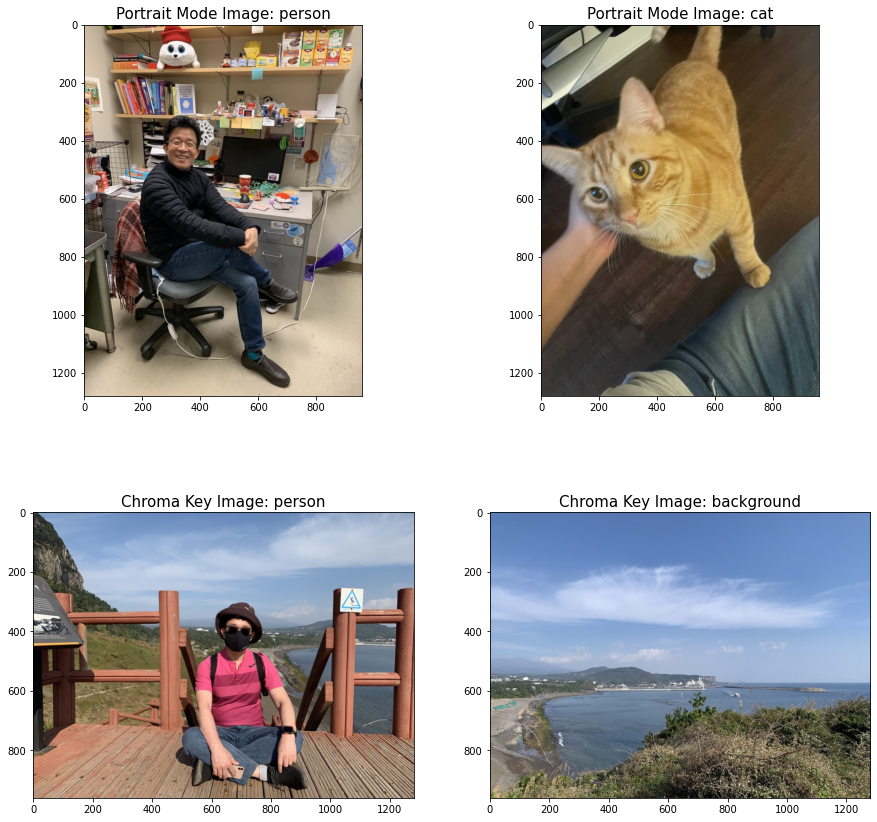

In [3]:
# 이미지 4개를 한꺼번에 처리하기!!!
# 인물 모드 (내 사진) 사진
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_office.jpg'
img_orig = cv2.imread(img_path) 
# 인물 모드 (고양이) 사진
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat1.jpg'
img_orig2 = cv2.imread(img_path2)
# 크로마키 인물 사진
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg_front.jpg'
img_orig3 = cv2.imread(img_path3) 
# 크로마키 배경 사진
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg1.jpg'
img_orig4 = cv2.imread(img_path4) 

print(img_orig.shape)
print(img_orig2.shape)
print(img_orig3.shape)
print(img_orig4.shape)

plt.figure(figsize=(60,60))

fig, ax_list = plt.subplots(2, 2, figsize=(15, 15))

ax_list[0, 0].imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
ax_list[0, 0].set_title("Portrait Mode Image: person", fontsize=15)
ax_list[0, 1].imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
ax_list[0, 1].set_title("Portrait Mode Image: cat", fontsize=15)
ax_list[1, 0].imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
ax_list[1, 0].set_title("Chroma Key Image: person", fontsize=15)
ax_list[1, 1].imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
ax_list[1, 1].set_title("Chroma Key Image: background", fontsize=15)

plt.show()


## 2. 사용할 Segmentation 모델 생성
- 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델 생성

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## 3. Segmentation으로 객체 (사람, 고양이 등) 분리하기

- PASCAL VOC 데이터의 라벨 종류 확인
  - 라벨 번호: person = 15, cat = 8, horse = 13, sheep = 17

In [5]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

### 3-1. Segmentation 모델에 이미지 입력

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

- segmentAsPascalvoc 함수: PASCAL VOC 데이터로 학습된 모델을 이용
  - 모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요

### 3-2. 모델에서 Segmentation 되어 나온 이미지 및 라벨 확인

- 이미지 확인

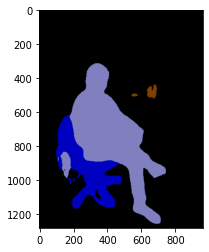

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  9, 15, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- output 이미지에는 세그멘테이션 된 결과가 각각 다른 색상으로 담겨 있음
- segvalues에는 class_ids와 masks가 있음

- 라벨 확인

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
tv


### 3-3. 추출해야 할 라벨의 색상 확인
- class_ids를 통해 어떤 물체가 담겨 있음!
  - 이제 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내면 될 것 같습니다.

In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 색상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

- PixelLib에 따르면 위와 같은 색을 사용했다고 하네요. 그럼 사람을 나타내는 15번째 색상은 무엇일까요?

In [11]:
# 라벨 번호: person = 15, cat = 8, horse = 13, sheep = 17
print('person=15: colormap', colormap[15])
print('cat=8: colormap', colormap[8])
print('horse=13: colormap', colormap[13])
print('sheep=17: colormap', colormap[17])

person=15: colormap [192 128 128]
cat=8: colormap [64  0  0]
horse=13: colormap [192   0 128]
sheep=17: colormap [128  64   0]


- 사람 외에도 다른 물체를 찾아내고 싶다면 colormap[class_id]처럼 찾아낼 수 있겠네요!

- 여기서 주의할 것은 output 이미지가 BGR 순서로 채널 배치가 되어 있다는 점이에요. colormap은 RGB 순서이고요.

- 그러니 우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 줘야 합니다.

In [12]:
seg_color = (128,128,192)

### 3-4. 결정된 색상 추출하고 난 이미지(마스크) 생성

(1280, 960)


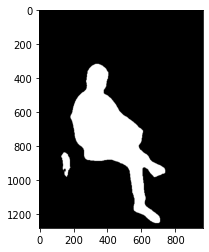

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

### 3-5. 원래 이미지와 겹쳐 보고 세그멘테이션 되는 부분 확인
- 배경에서 떼어낼 부분 확인

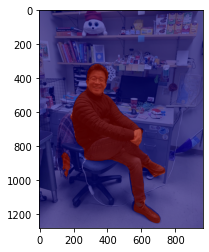

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.4, color_mask, 0.6, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 3-6. 원래 이미지 (배경) 흐리게 만들기

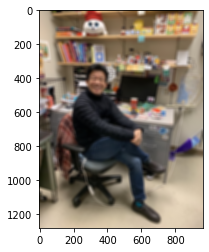

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 3-7. 흐려진 이미지에서 배경으로 사용할 부분만 추출
- 흐려진 배경에서 앞에서 세그멘테이션 한 부분만 오려냄

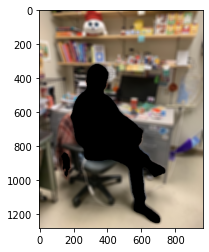

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 3-8. 흐린 배경과 원본 영상 합성
- 구멍 뚫린 배경 영상과 원본 영상 합치기
- 구멍 뚫린 부분에만 원본 영상 보임
- 인물모드 사진과 원본 사진 비교

<Figure size 2160x2160 with 0 Axes>

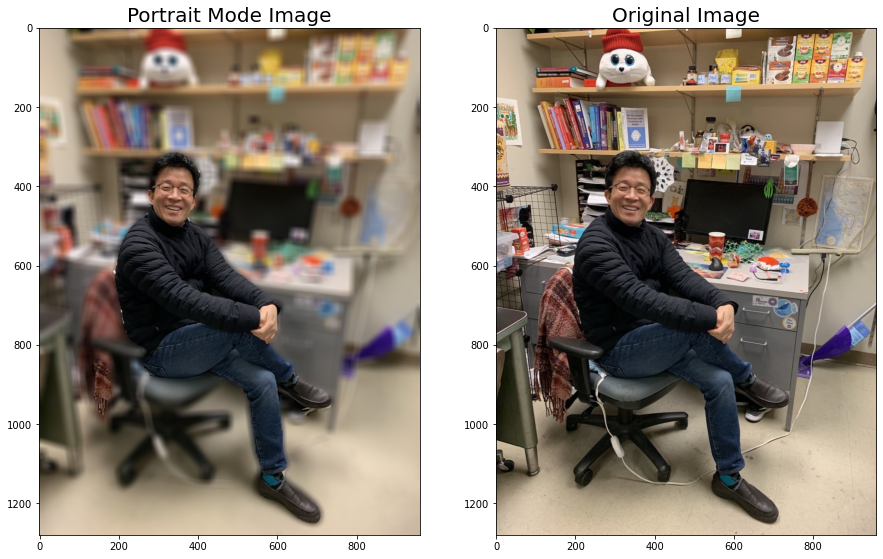

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.figure(figsize=(30,30))
fig, ax_list = plt.subplots(1, 2, figsize=(15, 15))

ax_list[0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax_list[0].set_title("Portrait Mode Image", fontsize=20)
ax_list[1].imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
ax_list[1].set_title("Original Image", fontsize=20)

plt.show()

In [18]:
# 결과 파일 저장 경로 지정
write_path = join(model_dir, 'portrait_person.png')
cv2.imwrite(write_path, img_concat)
print('{} saved!'.format(write_path))

/aiffel/aiffel/human_segmentation/models/portrait_person.png saved!


## 4. 위 내용(3-1부터 3-8까지) 함수로 만들기

In [19]:
#img_path = 이미지 파일 경로+이름
#class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)
#img_bg = 백그라운드로 사용할 이미지 파일 경로+이름
def semi_auto_seg(img_path, class_ids, img_bg):

    #Segmentation 모델에 이미지 입력
    segvalues, output = model.segmentAsPascalvoc(img_path)

    #모델에서 세그멘테이션된 이미지 확인
    plt.imshow(output)
    plt.show()

    #세그멘테이션된 물체 확인
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    #추출해야 하는 색상 값 지정. 15=사람, 8=고양이, 13=말, 17=양
    # 필요시 class_ids 계속 추가 가능
    if class_ids == 15:
        seg_color = (128, 128, 192)    #person=15: colormap [192 128 128]
    elif class_ids == 8:
        seg_color = (0, 0, 64)    #cat=8: colormap [64  0  0]
    elif class_ids == 13:
        seg_color = (128, 0, 192)    #horse=13: colormap [192   0 128]
    elif class_ids == 17:
        seg_color = (0, 64, 128)    #sheep=17: colormap [128  64   0]
    else:
        print ("class_id input ERROR! Add the class_ids to this function.")
    
    # seg_color로만 이루어진 마스크 생성
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()

    #원래 이미지와 겹쳐서 세그멘테이션이 얼마나 잘 되었는지 알아보기
    #=================================================================
    img_show = cv2.imread(img_path).copy()
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.4, color_mask, 0.6, 0.0)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    #=================================================================

    # 배경을 흐리게 만들기
    if img_path != img_bg: #크로마키는 배경 흐리게 하지 않음
        img_orig_blur = cv2.imread(img_bg)
    else:
        img_orig_blur = cv2.blur(cv2.imread(img_bg), (20,20)) 
        
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()

    #흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()

    #흐린 배경과 원본 영상 합성
    img_concat = np.where(img_mask_color==255, cv2.imread(img_path), img_bg_blur)
    # 인물모드 사진과 원본 사진 비교
    plt.figure(figsize=(40,40))
    fig, ax_list = plt.subplots(1, 2, figsize=(15, 15))

    ax_list[0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    ax_list[0].set_title("Portrait Mode Image", fontsize=20)
    ax_list[1].imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    ax_list[1].set_title("Original Image", fontsize=20)

    plt.show()
    return img_concat

- 인물 모드 (고양이) 사진
  - img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat1.jpg'
  - img_orig2 = cv2.imread(img_path2)
- 크로마키 인물 사진
  - img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg_front.jpg'
  - img_orig3 = cv2.imread(img_path3) 
- 크로마키 배경 사진
  - img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg2.jpg'
  - img_orig4 = cv2.imread(img_path4) 

## 5. 함수 이용 고양이 사진 Segmentation 하기

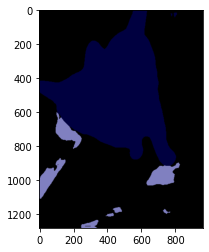

background
cat
person
(1280, 960)


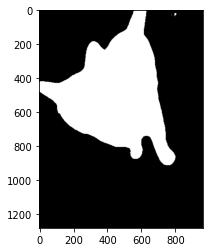

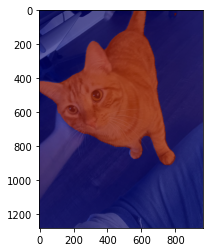

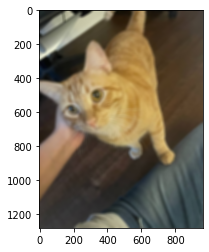

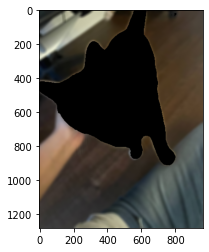

<Figure size 2880x2880 with 0 Axes>

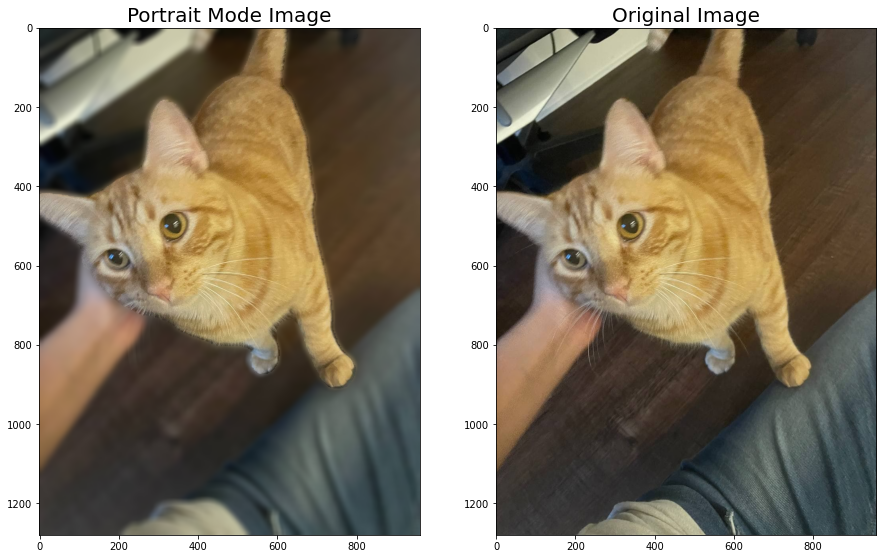

In [20]:
img_concat_cat = semi_auto_seg(img_path2, 8, img_path2) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

In [21]:
# 결과 파일 저장 경로 지정
write_path = join(model_dir, 'portrait_cat.png')
cv2.imwrite(write_path, img_concat_cat)
print('{} saved!'.format(write_path))

/aiffel/aiffel/human_segmentation/models/portrait_cat.png saved!


### 하나의 사진에서 다양한 객체 검출하기
- 사람과 캥거루가 있는 사진을 사용
- 고양이, 말, 사람, 양이 검출됨 ㅋㅋㅋ
  - 캥거루는 어디로???
- 위의 네 가지를 각각 Segmentation 해봄

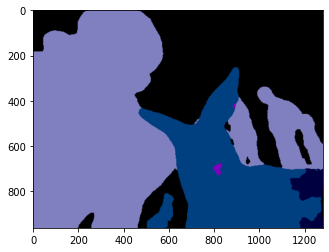

background
cat
horse
person
sheep
(961, 1280)


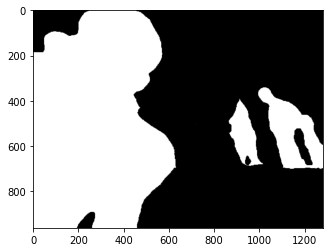

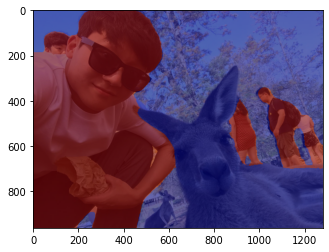

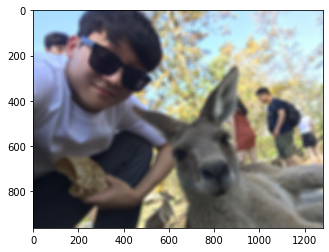

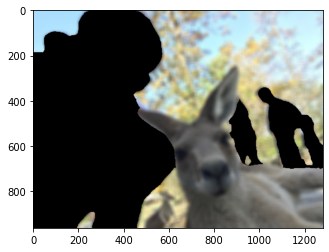

<Figure size 2880x2880 with 0 Axes>

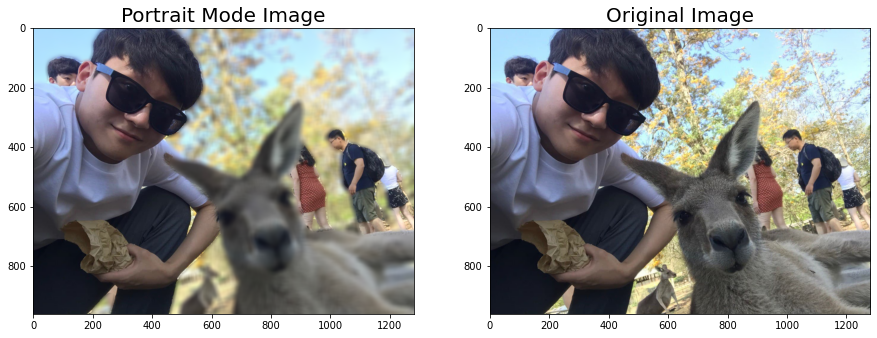

In [22]:
# 인물 모드 (캥거루) 사진
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/kang.jpg'
img_orig5 = cv2.imread(img_path5)
# 사람 검출
img_concat_person_w_kang = semi_auto_seg(img_path5, 15, img_path5) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 5명의 사람 검출 대체로 제대로 함

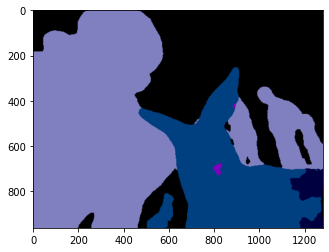

background
cat
horse
person
sheep
(961, 1280)


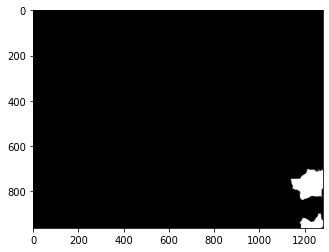

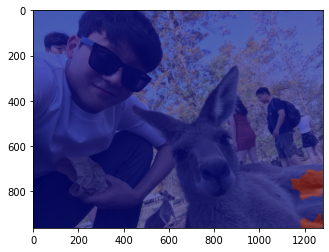

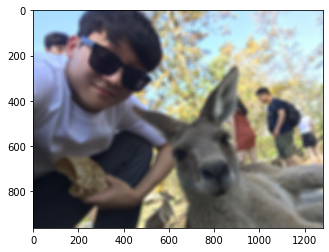

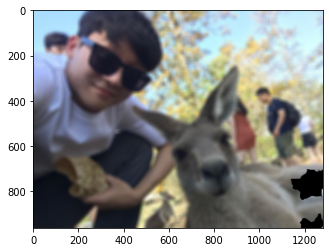

<Figure size 2880x2880 with 0 Axes>

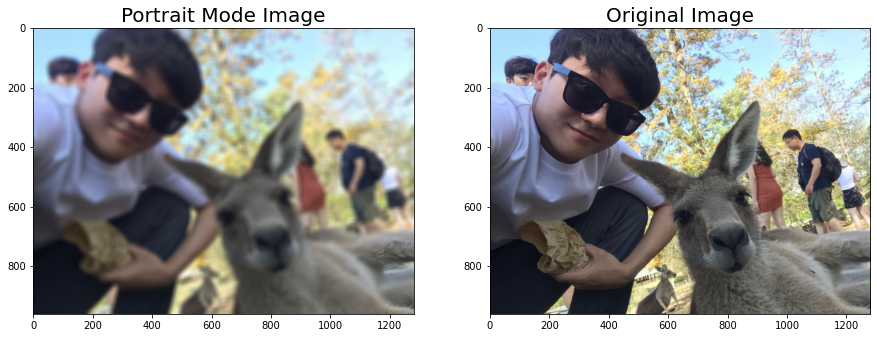

In [23]:
#고양이 검출
img_concat_kang = semi_auto_seg(img_path5, 8, img_path5) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 없는 고양이를 검출 했음 ㅎㅎㅎ

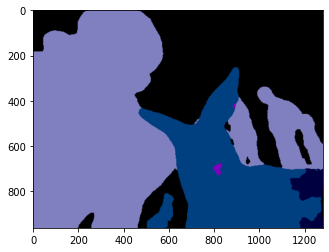

background
cat
horse
person
sheep
(961, 1280)


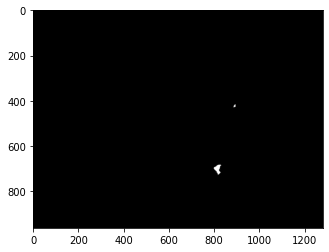

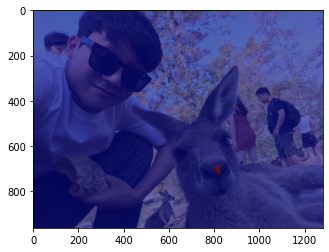

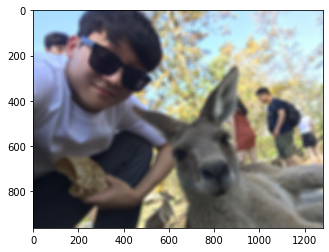

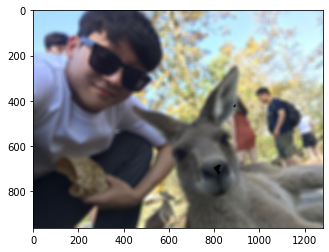

<Figure size 2880x2880 with 0 Axes>

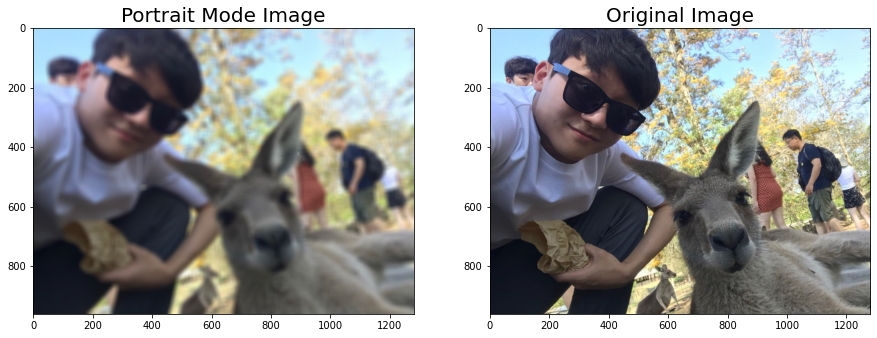

In [24]:
#말 검출
img_concat_kang = semi_auto_seg(img_path5, 13, img_path5) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 도대체 말은 어디에???

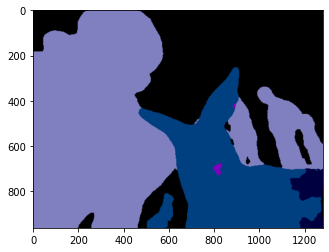

background
cat
horse
person
sheep
(961, 1280)


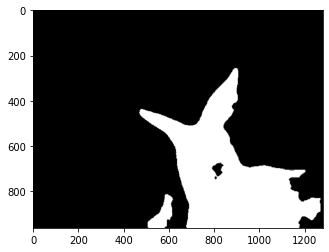

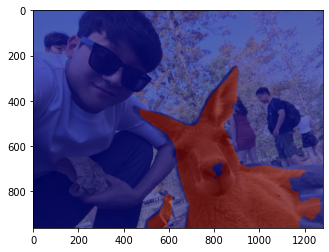

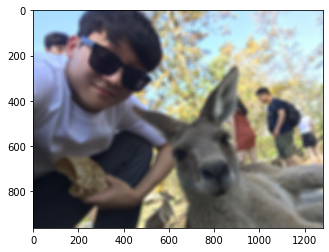

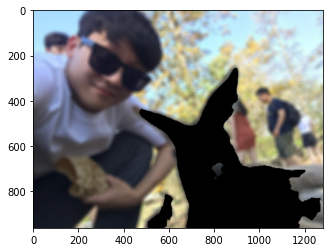

<Figure size 2880x2880 with 0 Axes>

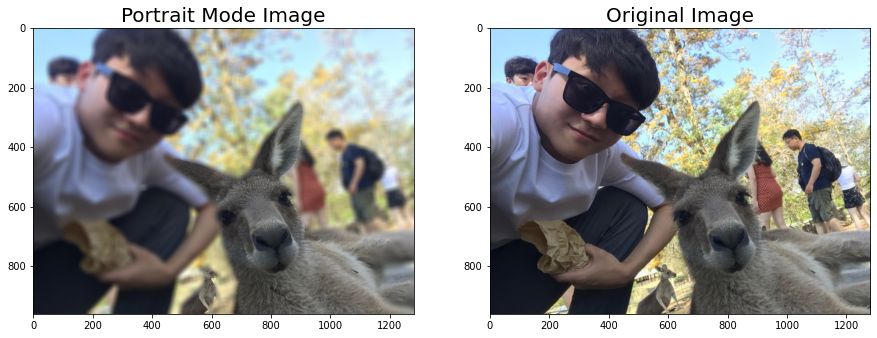

In [25]:
#양 검출
img_concat_kang = semi_auto_seg(img_path5, 17, img_path5) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 아하!!! 캥거루를 양으로 검출했군요! 작게 보이는 캥거루도 검출 했음...

## 6. 함수 이용 크로마키 만들기

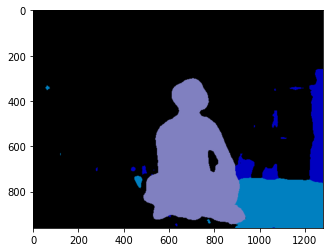

background
chair
diningtable
person
(960, 1280)


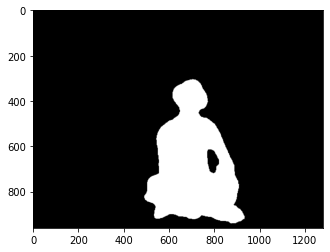

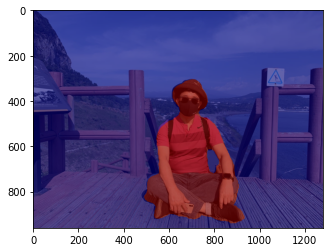

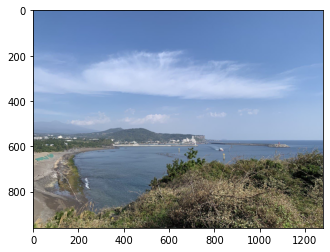

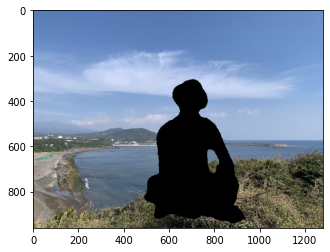

<Figure size 2880x2880 with 0 Axes>

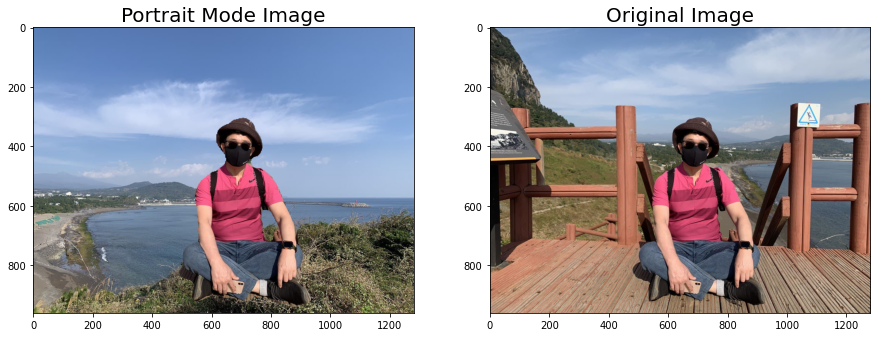

In [26]:
#다양한 배경 사진(img_path4의 파일 변경)으로 바꿀 수 있음
img_concat_chroma = semi_auto_seg(img_path3, 15, img_path4) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 그림자까지 같이 사람으로 검출하긴 했으나 대체로 그럴듯 함...

In [27]:
# 결과 파일 저장 경로 지정
write_path = join(model_dir, 'chromakey.png')
cv2.imwrite(write_path, img_concat_chroma)
print('{} saved!'.format(write_path))

/aiffel/aiffel/human_segmentation/models/chromakey.png saved!


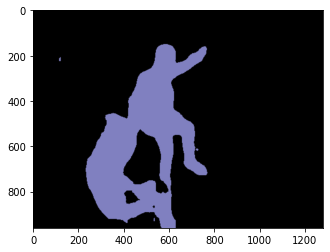

background
person
(960, 1280)


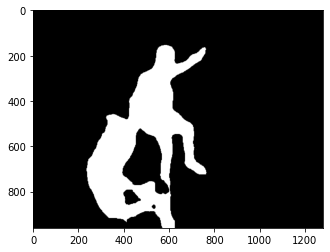

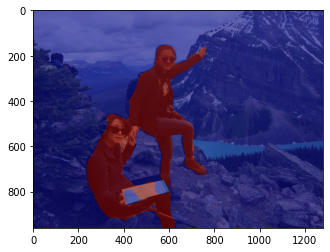

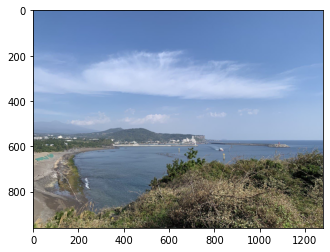

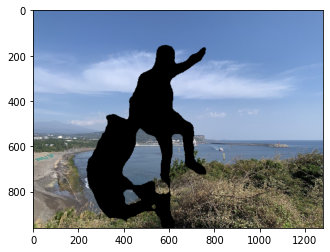

<Figure size 2880x2880 with 0 Axes>

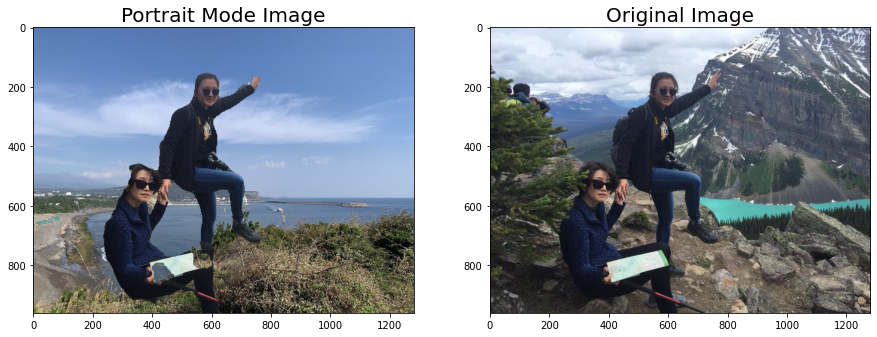

In [28]:
# 사람 2명 모드 (사람 2명) 사진
img_path6 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_two.jpg'
img_orig6 = cv2.imread(img_path6)
#배경 사진(img_path4의 파일 변경)은 앞과 같음
img_concat_chroma = semi_auto_seg(img_path6, 15, img_path4) #class_ids = 검출할 이미지 클래스 (15=사람, 8=고양이, 13=말, 17=양)

#### [결과] 나무에 가려진 머리 부분, 무릎 부분, 발끝 부분, 배낭, 손가락 V자 등이 제대로 검출되지 않은 부분이 많음.
- 사진처럼 무릎 위에 무엇을 들고 있을 때 처리하는 방법 보완 필요
- 요즘 광고에 나오는 것처럼 한 사람을 가리고 싶은 경우에는 가려지는 사람으로 인해 손상(?)되는 부분 보정 필요함
- 현재의 문제점이 segmentation model DeepLab v3+ 자체의 성능 문제인지, 이 모델을 학습시킨 데이터의 문제인지, 아니면 둘 다인지를 파악할 필요 있음
<br> <br> 
- 산에서 바다로 순간이동은 되었음 ㅎㅎ

## 7. 프로젝트: 인물 모드 문제점 찾기
만들면서 뭔가 이상한 점이 느껴지지 않으셨나요? 프로젝트를 통해 찾아봅시다.

### Step 1. 인물모드 직접 해 보기
- 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
  - **"3"에서 실행**
- 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다.
  - **"5" 에서 실행**
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다.
  - **"6"에서 실행**

### Step 2. 사진에서 문제점 찾기
- 그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.
- 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 표시해 봅시다.<br>
  표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

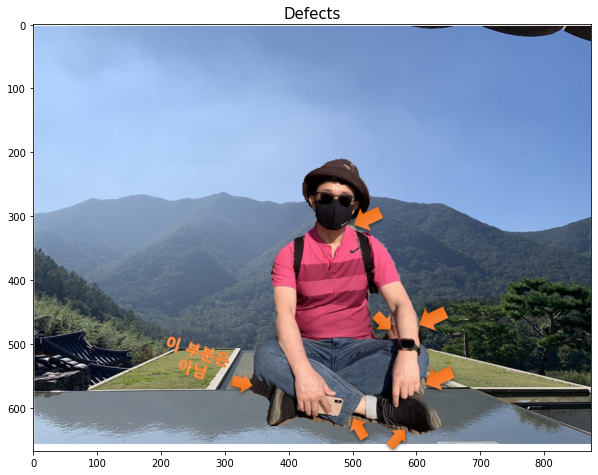

In [29]:
# 이상한 위치 표시 사진
img_path_defect = os.getenv('HOME')+'/aiffel/human_segmentation/models/chromakey_defect.png'
img_orig = cv2.imread(img_path_defect) 

plt.figure(figsize=(10,10))
plt.title("Defects", fontsize=15)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


### Step 3. 해결 방법을 제안해 보기
- 그림자 부분, 검출하고자 하는 대상과 색상이 비슷한 부분 등에서 검출이 잘 되지 않음
- 얼마나 세밀하고 깔끔하게 외곽선(edge)을 잘 따내느냐, 즉 검출력을 높일 수 있는 방법을 더 알아보아야 하겠음
- 또한 segmentation이 이루어진 부분에 대한 보정도 필요함
- 이런 보정을 accurate localization(boundary localization)이라고 하는 듯하며, Fully-Connected Conditional Random Field(CRF)를 통해 보정이 된다고 함 
  - 출처 및 참고 사이트
    - 라온피플 머신러닝 아카데미(https://m.blog.naver.com/laonple/221017461464)
    - DeepLab V1 "Smantic Image Segmentation With Deep Convolutional Nets And Fully Connected CRFs"(https://dailylime.kr/363)
    - 재활용 품목 분류를 위한 Semantic Segmentation 대회[2/3](https://re-code-cord.tistory.com/entry/%EC%9E%AC%ED%99%9C%EC%9A%A9-%ED%92%88%EB%AA%A9-%EB%B6%84%EB%A5%98%EB%A5%BC-%EC%9C%84%ED%95%9C-Semantic-Segmentation-%EB%8C%80%ED%9A%8C-23?category=980186)


- ...... !!!


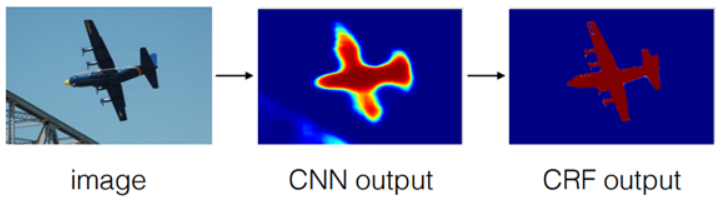

<center>이미지 출처(https://m.blog.naver.com/laonple/221017461464?view=img_1)</center>

## 프로젝트 평가

아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항 |	상세기준 | 실행 결과 | 
|:-----|:-----|:----| 
| 1. 인물모드 사진을 성공적으로 제작하였다. | 아웃포커싱 효과가 적용된 본인의 인물모드 사진과 <br> 고양이 사진, 배경전환 크로마키사진을 <br> 각각 1장 이상 성공적으로 제작하였다. | 제작했음 | 
| 2. 제작한 인물모드 사진들에서 나타나는 <br> 문제점을 정확히 지적하였다. | 인물사진에서 발생한 문제점을 정확히 <br> 지적한 사진을 제출하였다. |  제출했음 |
| 3. 인물모드 사진의 문제점을 개선할 수 있는 <br> 솔루션을 적절히 제시하였다. | 추가적인 depth 정보를 활용하여 <br> semantic segmentation mask의<br> 오류를 보완할 수 있는 좋은 솔루션을 <br> 구체적으로 제시하였다. | 전문지식이 <br> 더 필요함 |

